# Titanic: Machine Learning from Disaster

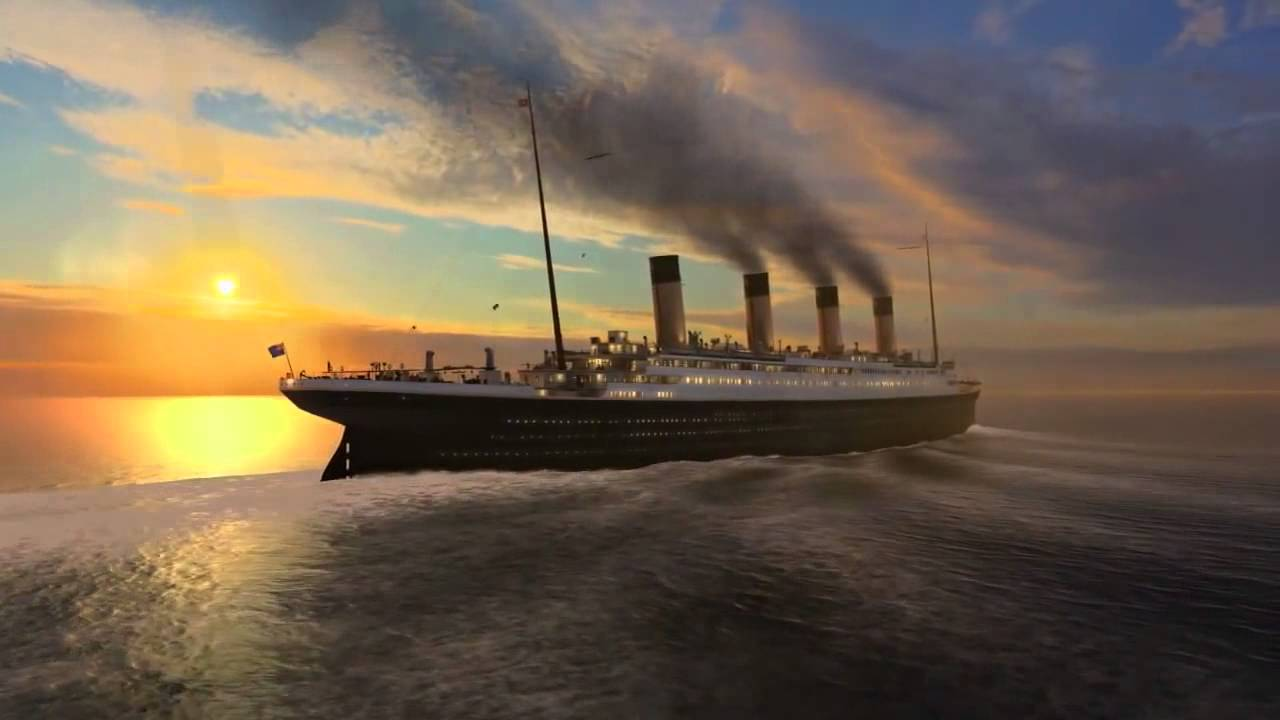

In [1]:
from IPython.display import Image
Image("titanic.jpg")

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [2]:
#import libraries and datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.utils import get_custom_objects
from keras.layers import Activation,Dropout
from keras.optimizers import Adam
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(16, 8.27) #set graphs size to A4 dimensions
sns.set(font_scale = 1.4)

train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')

Using TensorFlow backend.


# EXPLORATORY DATA ANALYSIS

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
for feature in train_set.columns:
    print(feature, round((train_set[feature].isnull().mean()*100),2),'% missing')

PassengerId 0.0 % missing
Survived 0.0 % missing
Pclass 0.0 % missing
Name 0.0 % missing
Sex 0.0 % missing
Age 19.87 % missing
SibSp 0.0 % missing
Parch 0.0 % missing
Ticket 0.0 % missing
Fare 0.0 % missing
Cabin 77.1 % missing
Embarked 0.22 % missing


In [8]:
for feature in test_set.columns:
    print(feature, round((test_set[feature].isnull().mean()*100),2),'% missing')

PassengerId 0.0 % missing
Pclass 0.0 % missing
Name 0.0 % missing
Sex 0.0 % missing
Age 20.57 % missing
SibSp 0.0 % missing
Parch 0.0 % missing
Ticket 0.0 % missing
Fare 0.24 % missing
Cabin 78.23 % missing
Embarked 0.0 % missing


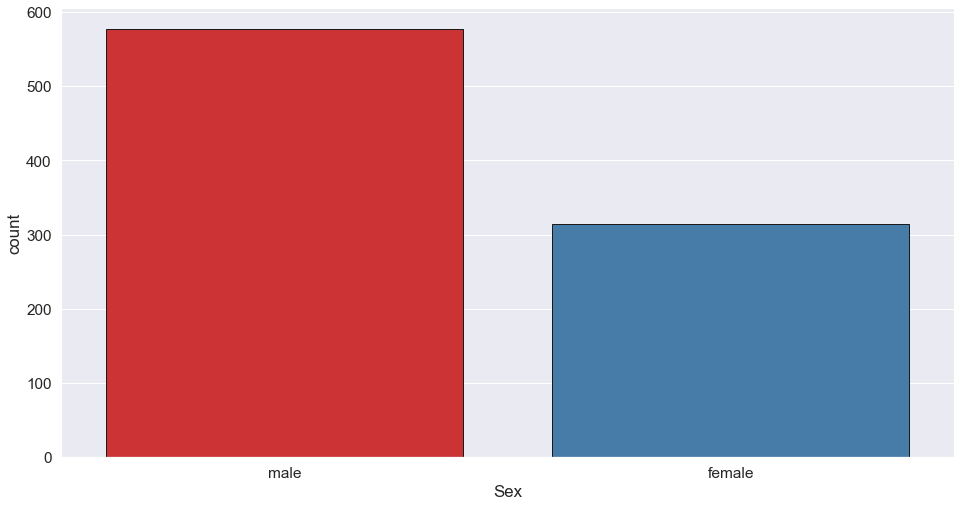

In [9]:
sns.countplot(train_set['Sex'],edgecolor="k", palette="Set1")

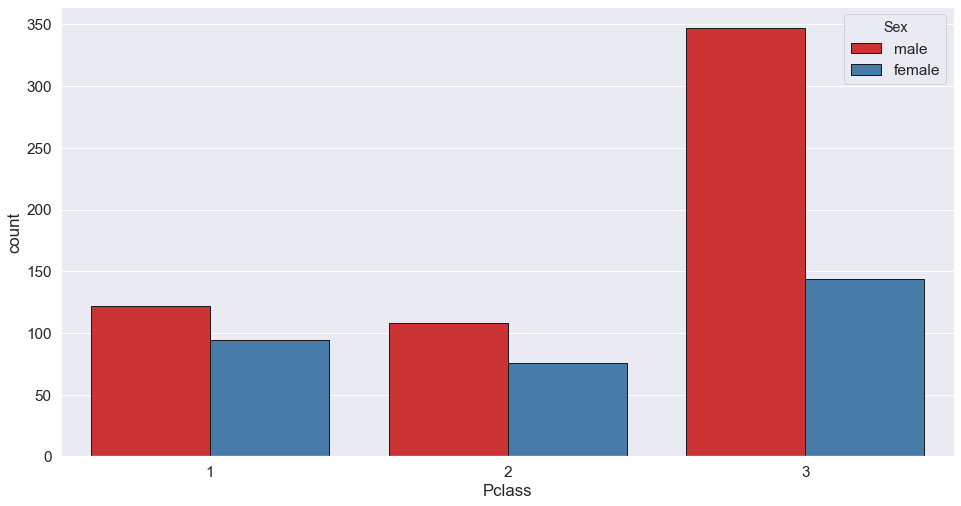

In [10]:
sns.countplot(train_set['Pclass'],hue=train_set['Sex'],edgecolor="k", palette="Set1")

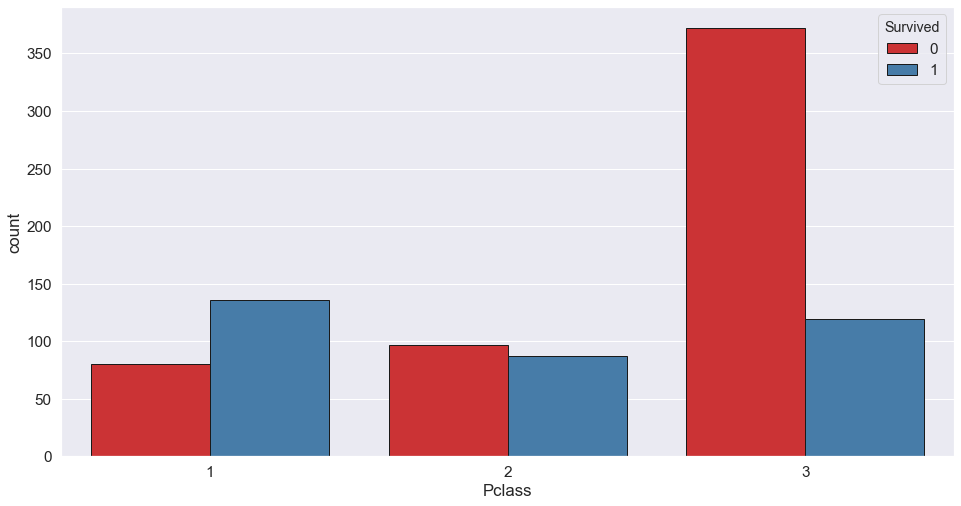

In [11]:
sns.countplot(train_set['Pclass'],hue=train_set['Survived'],edgecolor="k", palette="Set1")

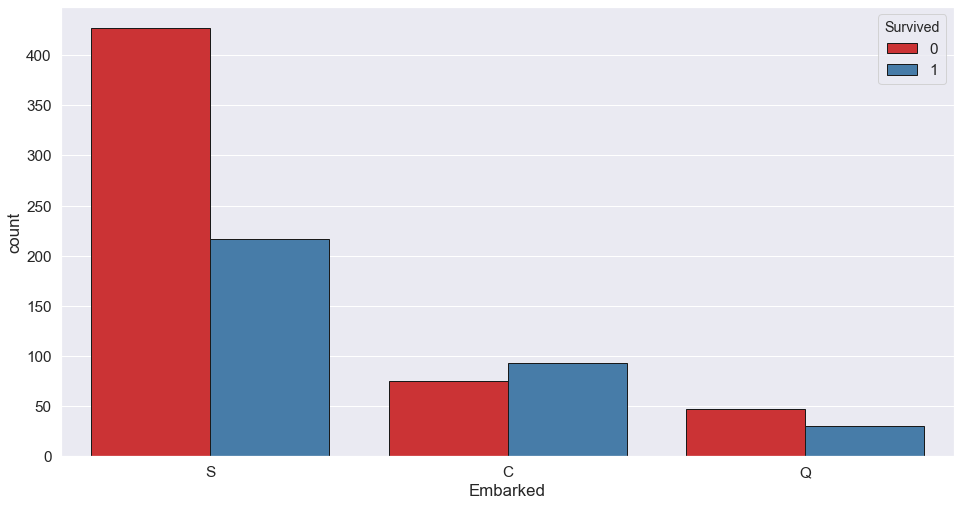

In [12]:
sns.countplot(train_set['Embarked'],hue=train_set['Survived'],edgecolor="k", palette="Set1")

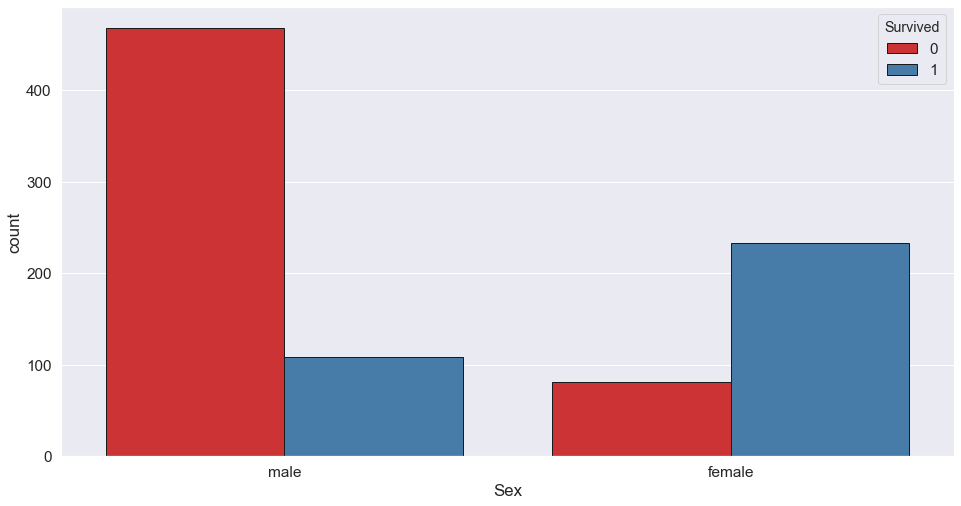

In [13]:
sns.countplot(train_set['Sex'],hue=train_set['Survived'],edgecolor="k", palette="Set1")

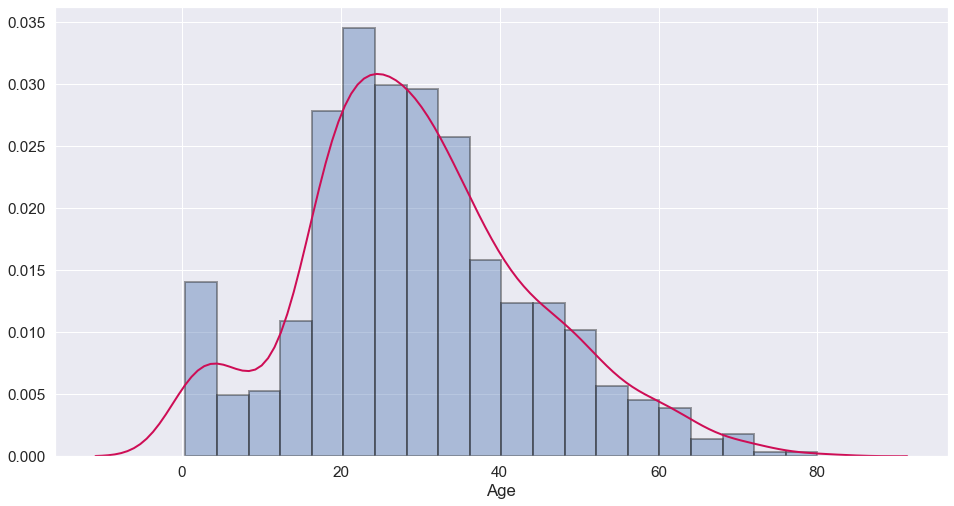

In [14]:
sns.distplot(train_set['Age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})

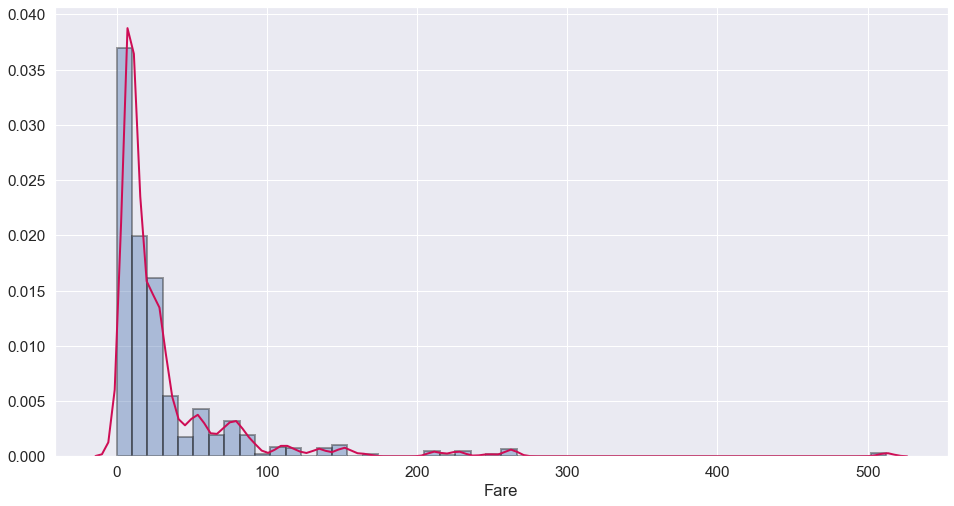

In [15]:
sns.distplot(train_set['Fare'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})

# FEATURE ENGINEERING 

In [16]:
# Combine train and test set to achieve a better accuracy score 
# !!This is NOT the proper way in a real-world use case scenario!!

dataset=pd.concat([train_set,test_set])    

In [17]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
#sex mapping 
dataset['Sex']=np.where(dataset['Sex']=='male',1,0) #convert Male to 1 and Female to 0

In [19]:
#Title mapping
dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#transform all titles to 6 unique categories
Title_Dict = { "Capt": "Officer", "Col": "Officer", "Major": "Officer", "Jonkheer": "Royalty", "Don": "Royalty",
                    "Sir" : "Royalty", "Dr": "Officer", "Rev": "Officer", "the Countess":"Royalty", "Mme": "Mrs",
                    "Mlle": "Miss", "Ms": "Mrs", "Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master",
                    "Lady" : "Royalty" }

dataset['Title'] = dataset['Title'].map(Title_Dict) #apply transformation to the column

In [20]:
dataset[dataset['Title'].isnull()] #check if mapping worked properly

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,110152,86.5,B77,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [21]:
dataset['Title'].fillna('Mrs',inplace=True) #filling NaN values with Mrs because both passengers are ladies at 30's 

In [22]:
dataset['Title'].value_counts() #check frequency of each category

Mr         757
Miss       262
Mrs        202
Master      61
Officer     23
Royalty      4
Name: Title, dtype: int64

In [23]:
#encoding categories according to the frequency in dataset (0 most common, 5 rarest) and apply them to dataset
title_labels=dataset['Title'].value_counts().index
title_labels={k:i for i,k in enumerate(title_labels,0)}
dataset['Title']=dataset['Title'].map(title_labels)

In [24]:
dataset['Title'].value_counts() #chech if encoding worked properly

0    757
1    262
2    202
3     61
4     23
5      4
Name: Title, dtype: int64

In [25]:
cabin_mapping={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7} #find cabins unique starting letter and encode them

dataset['Cabin']=dataset['Cabin'].str[:1]
dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

#fill nan values of cabin feature, according to the median cabin value for each class.  
dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'),inplace=True) 

In [26]:
#fill nan values for age, according to the median value of each category title.
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)

In [27]:
#fill nan values of Embarked with 'S' because is the mode value for embarked feature
dataset['Embarked'] = dataset['Embarked'].fillna('S')

#encode the embarked feature according to the frequency of each class.(2 most common, 0 rarest)
embarked_mapping = {"S": 2, "C": 1, "Q": 0}
dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)# apply encoding to dataset

In [28]:
#fill nan values for Fare feature, according to median of fare for each cabin unique value.
dataset["Fare"].fillna(dataset.groupby("Cabin")["Fare"].transform("median"), inplace=True)

In [29]:
#Create a new feature FamilySize that includes all members of Parch and SibSp for every passenger 
#(including the passenger too)
dataset['FamilySize']=dataset['Parch']+dataset['SibSp']+1
dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

In [30]:
dataset['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [31]:
#apply sqrt transformation to handle outliers.
dataset['Age']=np.sqrt(dataset['Age'])
dataset['Fare']=np.sqrt(dataset['Fare'])
dataset['FamilySize']=np.sqrt(dataset['FamilySize'])

In [32]:
#drop unuseful features
dataset.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

#split features (X) from target (y)
X=dataset.drop('Survived',axis=1)
y=dataset['Survived']

#scaling the X dataframe (features)
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(X)
scaled_features_X=pd.DataFrame(scaled_features,columns=X.columns)
scaled_features_X.index=X.index

#concat scaled X features with y target 
final_dataset=pd.concat([scaled_features_X,y],axis=1)

In [33]:
X=final_dataset.drop('Survived',axis=1)
y=final_dataset['Survived']

#split to train and test set
X_train=X[:891]
X_test=X[891:]

y_train=y[:891]
y_test=y[891:]

### Let's create an Artificial Neural Network to predict if a passenger has survived or not.

In [40]:
class Swish(Activation):
    
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x):
    return (K.sigmoid(x) * x)

get_custom_objects().update({'swish': Swish(swish)})


#build custom Adam optimizer 
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'normal',activation='swish', input_dim = 8))

#Adding the second hidden layer
classifier.add(Dense(units =64, kernel_initializer = 'normal', activation='swish'))

classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split=0.1, shuffle=True)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# each prediction above 0.5 is classified as 1 and the rest as 0
y_pred = (y_pred > 0.5)
y_pred= y_pred*1
y_pred =y_pred.reshape(418)
y_pred=pd.Series(y_pred).rename('Survived')


Train on 801 samples, validate on 90 samples
Epoch 1/200
801/801 [==============================] - 0s 410us/step - loss: 0.6798 - accuracy: 0.6055 - val_loss: 0.6582 - val_accuracy: 0.6222
Epoch 2/200
801/801 [==============================] - 0s 149us/step - loss: 0.6445 - accuracy: 0.6155 - val_loss: 0.6099 - val_accuracy: 0.6222
Epoch 3/200
801/801 [==============================] - 0s 133us/step - loss: 0.6069 - accuracy: 0.6167 - val_loss: 0.5756 - val_accuracy: 0.6222
Epoch 4/200
801/801 [==============================] - 0s 134us/step - loss: 0.5692 - accuracy: 0.6929 - val_loss: 0.5341 - val_accuracy: 0.7889
Epoch 5/200
801/801 [==============================] - 0s 123us/step - loss: 0.5228 - accuracy: 0.7553 - val_loss: 0.4872 - val_accuracy: 0.8000
Epoch 6/200
801/801 [==============================] - 0s 136us/step - loss: 0.4871 - accuracy: 0.7778 - val_loss: 0.4707 - val_accuracy: 0.7444
Epoch 7/200
801/801 [==============================] - 0s 128us/step - loss: 0.4698 -

Epoch 57/200
801/801 [==============================] - 0s 125us/step - loss: 0.4288 - accuracy: 0.8127 - val_loss: 0.3911 - val_accuracy: 0.8111
Epoch 58/200
801/801 [==============================] - 0s 123us/step - loss: 0.4262 - accuracy: 0.8127 - val_loss: 0.3924 - val_accuracy: 0.8111
Epoch 59/200
801/801 [==============================] - 0s 125us/step - loss: 0.4290 - accuracy: 0.8202 - val_loss: 0.3902 - val_accuracy: 0.8111
Epoch 60/200
801/801 [==============================] - 0s 137us/step - loss: 0.4274 - accuracy: 0.8165 - val_loss: 0.3942 - val_accuracy: 0.8222
Epoch 61/200
801/801 [==============================] - 0s 135us/step - loss: 0.4312 - accuracy: 0.8102 - val_loss: 0.3888 - val_accuracy: 0.8000
Epoch 62/200
801/801 [==============================] - 0s 126us/step - loss: 0.4260 - accuracy: 0.8177 - val_loss: 0.3928 - val_accuracy: 0.8222
Epoch 63/200
801/801 [==============================] - 0s 126us/step - loss: 0.4244 - accuracy: 0.8065 - val_loss: 0.3929 -

801/801 [==============================] - 0s 126us/step - loss: 0.4227 - accuracy: 0.8202 - val_loss: 0.3821 - val_accuracy: 0.8111
Epoch 114/200
801/801 [==============================] - 0s 123us/step - loss: 0.4242 - accuracy: 0.8265 - val_loss: 0.3806 - val_accuracy: 0.8000
Epoch 115/200
801/801 [==============================] - 0s 121us/step - loss: 0.4260 - accuracy: 0.8177 - val_loss: 0.3823 - val_accuracy: 0.8222
Epoch 116/200
801/801 [==============================] - 0s 128us/step - loss: 0.4282 - accuracy: 0.8240 - val_loss: 0.3804 - val_accuracy: 0.8000
Epoch 117/200
801/801 [==============================] - 0s 130us/step - loss: 0.4207 - accuracy: 0.8227 - val_loss: 0.3836 - val_accuracy: 0.8222
Epoch 118/200
801/801 [==============================] - 0s 124us/step - loss: 0.4222 - accuracy: 0.8177 - val_loss: 0.3815 - val_accuracy: 0.8000
Epoch 119/200
801/801 [==============================] - 0s 131us/step - loss: 0.4220 - accuracy: 0.8202 - val_loss: 0.3815 - val_ac

Epoch 169/200
801/801 [==============================] - 0s 133us/step - loss: 0.4246 - accuracy: 0.8252 - val_loss: 0.3801 - val_accuracy: 0.8222
Epoch 170/200
801/801 [==============================] - 0s 121us/step - loss: 0.4187 - accuracy: 0.8215 - val_loss: 0.3794 - val_accuracy: 0.8000
Epoch 171/200
801/801 [==============================] - 0s 123us/step - loss: 0.4219 - accuracy: 0.8190 - val_loss: 0.3819 - val_accuracy: 0.8222
Epoch 172/200
801/801 [==============================] - 0s 128us/step - loss: 0.4236 - accuracy: 0.8177 - val_loss: 0.3840 - val_accuracy: 0.8222
Epoch 173/200
801/801 [==============================] - 0s 129us/step - loss: 0.4175 - accuracy: 0.8215 - val_loss: 0.3816 - val_accuracy: 0.8222
Epoch 174/200
801/801 [==============================] - 0s 131us/step - loss: 0.4224 - accuracy: 0.8190 - val_loss: 0.3820 - val_accuracy: 0.8222
Epoch 175/200
801/801 [==============================] - 0s 133us/step - loss: 0.4233 - accuracy: 0.8152 - val_loss: 0

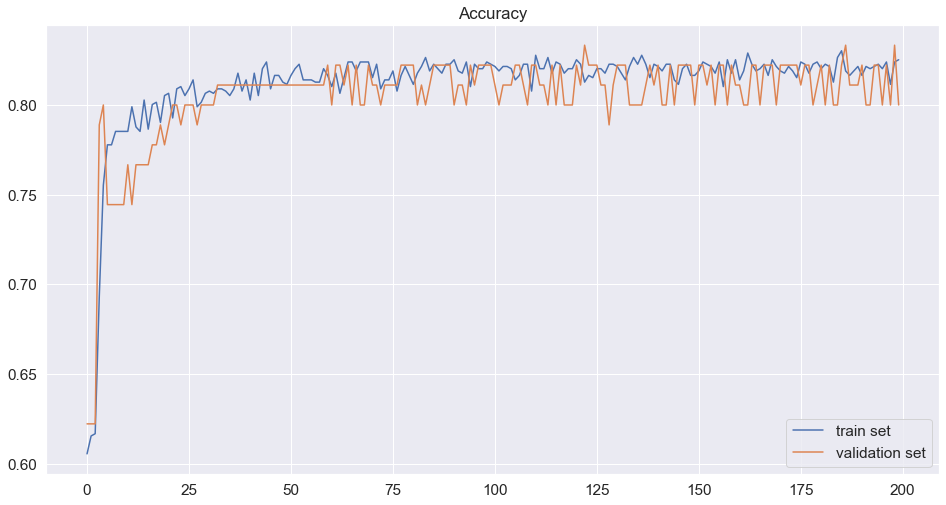

In [44]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train set')
plt.plot(history.history['val_accuracy'], label='validation set')
plt.legend()
plt.show()

#### Now we are going to evaluate the results on the initial test set

In [42]:
users_id=test_set['PassengerId']

#concat users id and y_pred to create final submission DataFramet
submission=pd.concat([users_id,y_pred],axis=1)

#export to csv
submission.to_csv('submission.csv',index=False)